In [43]:
#Lag en modell som predikerer tilsvarende NOT-operatoren.
#Visualiser resultatet etter optimaliseringen av modellen.

In [44]:
import torch
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [45]:
#Les csv fil
data = torch.Tensor(genfromtxt('day_head_circumference.csv', delimiter=',', dtype='f'))
x_train = torch.reshape(data[:,0], (-1,1))
y_train = torch.reshape(data[:,1], (-1,1))

In [46]:
class Model:
    def __init__(self):
        self.W = torch.tensor([[0.0]], requires_grad=True)
        self.b = torch.tensor([[0.0]], requires_grad=True)

    def f(self,x):
        return 20*torch.sigmoid(x @self.W + self.b) +31

    def loss(self, x,y):
        return(torch.nn.functional.binary_cross_entropy_with_logits(self.f(x),y))


model = Model()

In [47]:
optimizer = torch.optim.SGD([model.W,model.b], 0.000001)
for epoch in range(10000):
    model.loss(x_train, y_train).backward()
    optimizer.step()
    optimizer.zero_grad()

AttributeError: module 'torch.nn' has no attribute 'BCEloss'

W = tensor([[0.0023]], requires_grad=True), b= tensor([[-0.0154]], requires_grad=True), loss = tensor(2.8639, grad_fn=<MseLossBackward>)


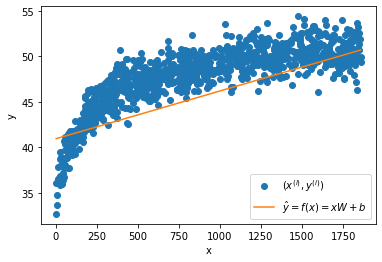

In [ ]:
print("W = %s, b= %s, loss = %s" % (model.W,model.b,model.loss(x_train, y_train)))

#plot
plt.plot(x_train,y_train, 'o', label='$(x^{(i)}, y^{(i)})$')
plt.xlabel('x')
plt.ylabel('y')
x = torch.tensor([[torch.min(x_train)], [torch.max(x_train)]])
plt.plot(x, model.f(x).detach(), label='$\\hat y = f(x) = xW+b$')
plt.legend()
plt.show()